# Linear Regression and Multiple Linear Regression
1. Simple Linear Regression: Simple Linear Regression is a method to help us understand the relationship between two variables:
2. The predictor/independent variable (X)
3. The response/dependent variable (that we want to predict)(Y)
4. The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Saugata/Data Science/IBM Data Science Professional Certificate/7. Data Analysis/Data/automobileEDA.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
lm = LinearRegression()

In [96]:
# How could "highway-mpg" help us predict car price
X = df[['highway-mpg']]
Y = df['price']

In [97]:
# Using simple linear regression, create a linear function with "highway-mpg" as the predictor variable and the "price" 
#as the response variable.Fit the linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#output a prediction:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [109]:
df['price'][0:5]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [8]:
#value of the intercept and coefficient
print(lm.intercept_)
print(lm.coef_)


38423.305858157386
[-821.73337832]


### final estimated linear model:
1. yhat = a+bx, Plugging in the actual values we get:
2. Price = 38423.31 - 821.73 x highway-mpg

In [9]:
#Create a linear regression object called "lm1"
lm1 = LinearRegression()

In [10]:
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable?
X = df[['engine-size']]
Y = df[['price']]
lm1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#Find the slope and intercept of the model.
print(lm1.intercept_)
print(lm1.coef_)

[-7963.33890628]
[[166.86001569]]


### What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

price = -7963.34 + 166.86 x engine-size

## Multiple Linear Regression: two or more predictor (independent) variables


In [13]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [14]:
lm2=LinearRegression()
lm2.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#Find the slope and intercept of the model.
print(lm2.intercept_)
print(lm2.coef_)

-15806.624626329198
[53.49574423  4.70770099 81.53026382 36.05748882]


1.  yhat - a + b1x1 + b2x2 + b3x3 + bx4
2.  Price = -15806 + 53 x horsepower + 4 x curb-weight + 81 x engine-size + 36 x highway-mpg

In [16]:
# Create and train a Multiple Linear Regression model "lm3" where the response variable is "price", and the predictor variable 
#is "normalized-losses" and "highway-mpg".
lm3 = LinearRegression()
lm3.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#Find the coefficient of the model.
lm3.coef_

array([   1.49789586, -820.45434016])

(0.0, 48196.96398984163)

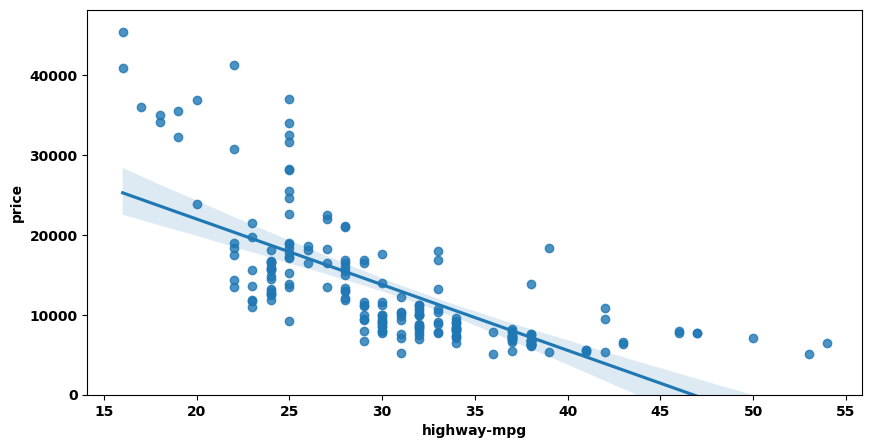

In [18]:
#evaluate our models and choose the best one? One way to do this is by using a visualization.
plt.figure(figsize=(10, 5))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

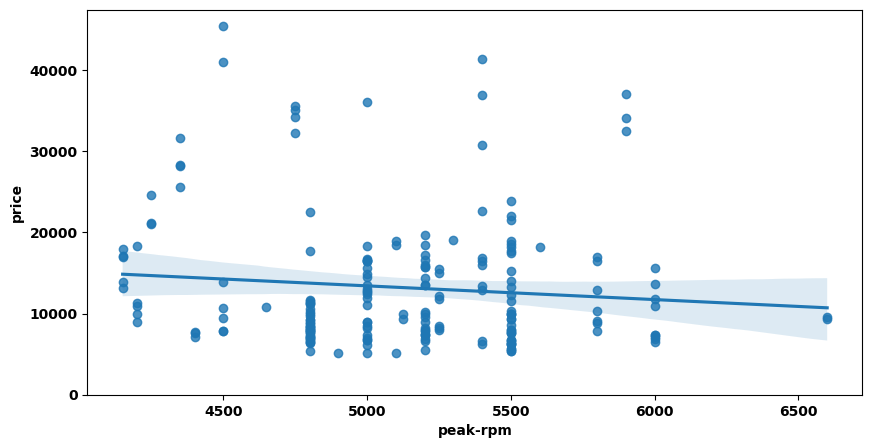

In [19]:
plt.figure(figsize=(10, 5))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Conclusion: Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increa

In [20]:
#  "peak-rpm" or "highway-mpg": which one is more strongly correlated with "price"? 

In [21]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot
1. Residual: The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.
2. Residual plot: A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

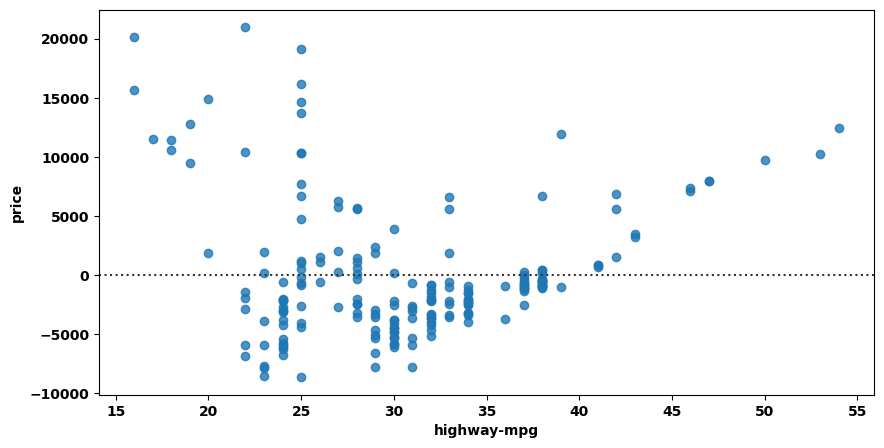

In [22]:
plt.figure(figsize=(10,5))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

Conclusion:  residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

### Multiple Linear Regression

In [23]:
#prediction:
Y_hat = lm2.predict(Z)

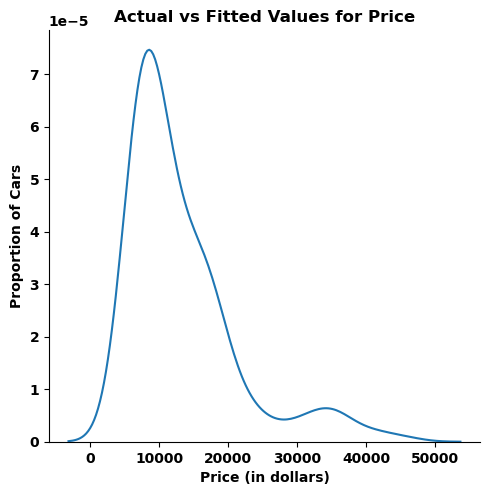

In [24]:


#ax1 = sns.displot(df['price'], hist=True, color="r", label="Actual Value")
#sns.displot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)
sns.displot(df['price'], kind='kde')

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()



## Polynomial Regression
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.There are different orders of 
Pol Reg.
Quadratic : yhat=a+b1x+b2x^2

In [25]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [26]:
x = df['highway-mpg']
y = df['price']

In [27]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


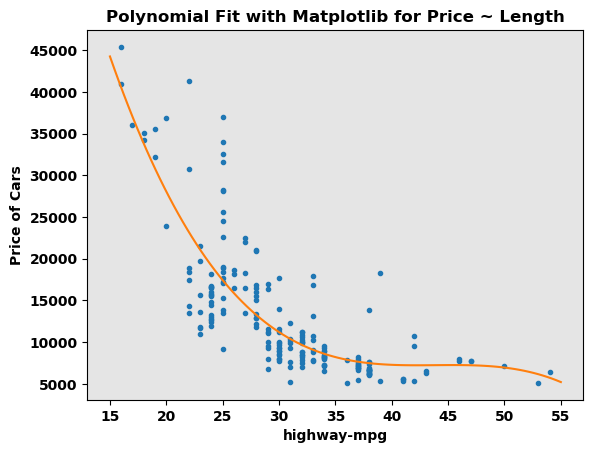

In [28]:
PlotPolly(p, x, y, 'highway-mpg')

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


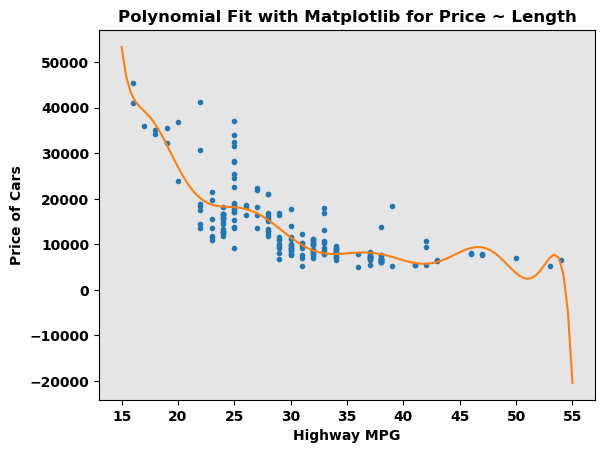

In [29]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [30]:
#perform a polynomial transform on multiple features. First, we import the module:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
#create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [32]:
Z_pr=pr.fit_transform(Z)

In [33]:
#In the original data, there are 201 samples and 4 features.
Z.shape

(201, 4)

In [34]:
Z_pr.shape

(201, 15)

## Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
#We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [37]:
#We input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [38]:
print(Z)

     horsepower  curb-weight  engine-size  highway-mpg
0         111.0         2548          130           27
1         111.0         2548          130           27
2         154.0         2823          152           26
3         102.0         2337          109           30
4         115.0         2824          136           22
..          ...          ...          ...          ...
196       114.0         2952          141           28
197       160.0         3049          141           25
198       134.0         3012          173           23
199       106.0         3217          145           27
200       114.0         3062          141           25

[201 rows x 4 columns]


In [39]:
#convert the data type Z to type float for StandardScaler taking float inputs.
# Normalize the data
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [40]:
#Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

## Measures for In-Sample Evaluation

In [41]:
#calculate the R^2:
lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


In [42]:
#calculate the MSE:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]]


In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


## Errors for Multiple Linear Regression

In [45]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [46]:
#produce a prediction:
Y_predict_multifit = lm.predict(Z)

In [47]:
#compare the predicted results with the actual results
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


## Errors in  Polynomial Fit

In [48]:
#import the function r2_score from the module metrics as we are using a different function
from sklearn.metrics import r2_score

In [49]:
# get the value of R^2:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [50]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## Prediction and Decision Making

Prediction: In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [51]:
#converting array into a column vector
new_input=np.arange(1, 100, 1).reshape(-1, 1)
new_input[0:9]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [52]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[-7796.47889059],
       [-7629.6188749 ],
       [-7462.75885921],
       [-7295.89884352],
       [-7129.03882782]])

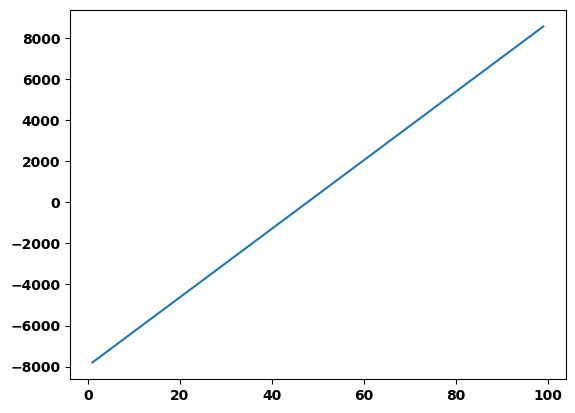

In [54]:
plt.plot(new_input, yhat)
plt.show()

1. What is a good R-squared value? -When comparing models, the model with the higher R-squared value is a better fit for the data.
2. What is a good MSE? - the model with the smallest MSE value is a better fit for the data
3. The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. 
4. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

## Model Evaluation

In [55]:
url = "D:/Saugata/Data Science/IBM Data Science Professional Certificate/7. Data Analysis/Data/module_5_auto.csv"
df = pd.read_csv(url)

In [56]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [57]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [58]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [59]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [60]:
# Training and Test Data
y_data = df['price']

In [61]:
x_data=df.drop('price',axis=1)

In [62]:
#Randomly split our data into training and testing data using the function train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".

In [63]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [64]:
#import LinearRegression from the module linear_model
from sklearn.linear_model import LinearRegression

In [65]:
#create a Linear Regression object:
lre=LinearRegression()

In [66]:
#fit the model using the feature "horsepower":
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
#calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [68]:
#R^2 is much smaller using the test data compared to the training data.
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

In [69]:
#Find the R^2 on the test data using 40% of the dataset for testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

## Cross-Validation Score

In [70]:
#import model_selection from the module cross_val_score
from sklearn.model_selection import cross_val_score

In [71]:
#input("horsepower"), and the target (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [72]:
#default scoring is R^2. Each element in the array has the average R^2 value for the fold:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [73]:
#calculate the average and standard deviation of our estimate:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [74]:
#We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [75]:
#Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [76]:
#use'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.
from sklearn.model_selection import cross_val_predict

In [77]:
#input the object, the feature "horsepower", and the target data y_data. The parameter 'cv' determines the number of folds. 
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Overfitting, Underfitting and Model Selection

In [78]:
#Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
#Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [80]:
y_train[0:5]

159     8058.0
16     36880.0
108    15580.0
31      5399.0
44     32250.0
Name: price, dtype: float64

In [81]:
#Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [84]:
y_test[0:5]

97      9549.0
117     6229.0
59     10245.0
35      7295.0
165     9989.0
Name: price, dtype: float64

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

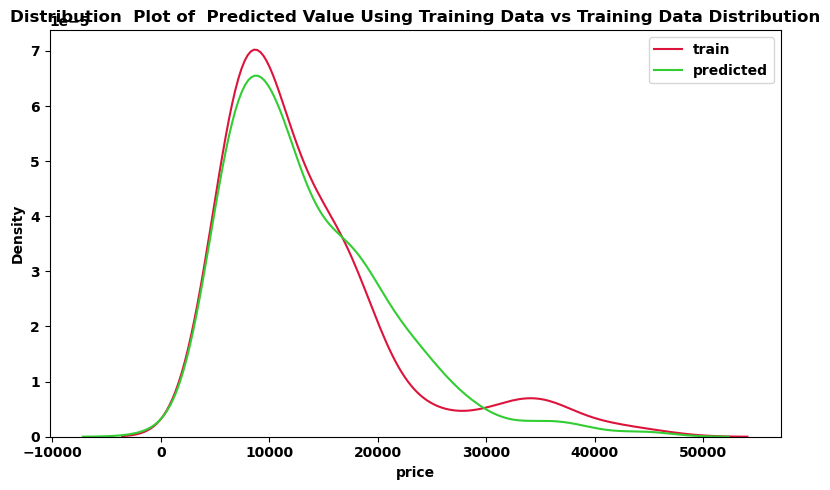

In [87]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(data=y_train, color='crimson', label='train', fill=False, ax=ax).set(title="Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution")
sns.kdeplot(data=yhat_train,color='limegreen', label='predicted', fill=False, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

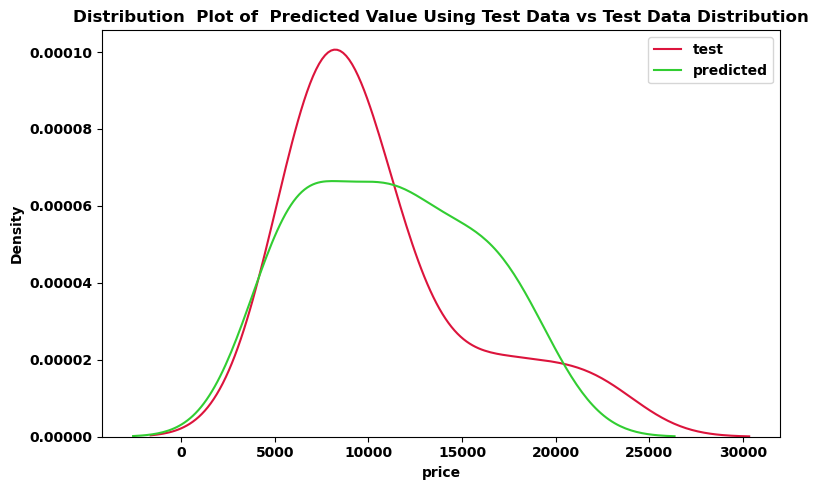

In [88]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(data=y_test, color='crimson', label='test', fill=False, ax=ax).set(title="Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution")
sns.kdeplot(data=yhat_test,color='limegreen', label='predicted', fill=False, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

## Overfitting

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [90]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [91]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.70501896,  7308.02845162, 12213.7843307 , 18893.19108677,
       19995.88963424])

In [110]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.70501896  7308.02845162 12213.7843307  18893.19108677]
True values: [ 6295. 10698. 13860. 13499.]


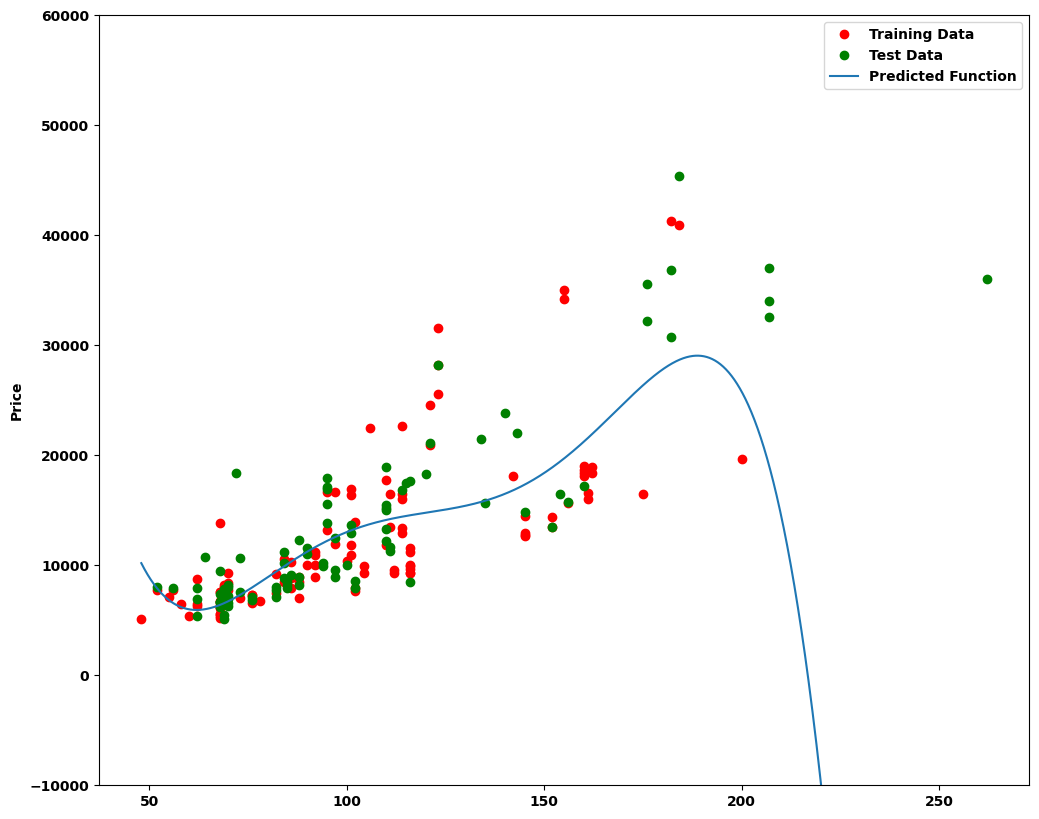

In [111]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

1. A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.
2. We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [112]:
#R^2 of the training data:
poly.score(x_train_pr, y_train)

0.5567716902635091

In [113]:
#R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.87141885918752

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

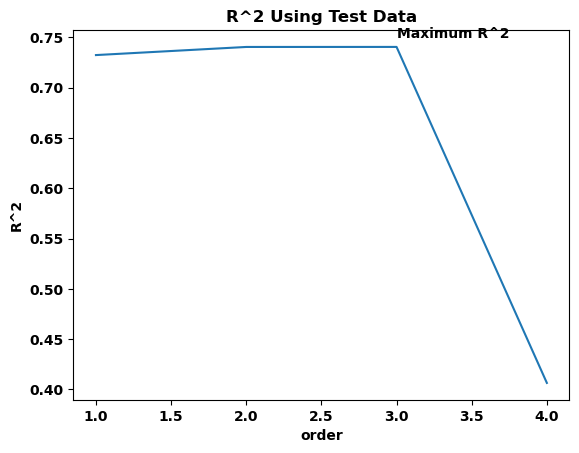

In [114]:
#how the R^2 changes on the test data for different order polynomials and then plot the results:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

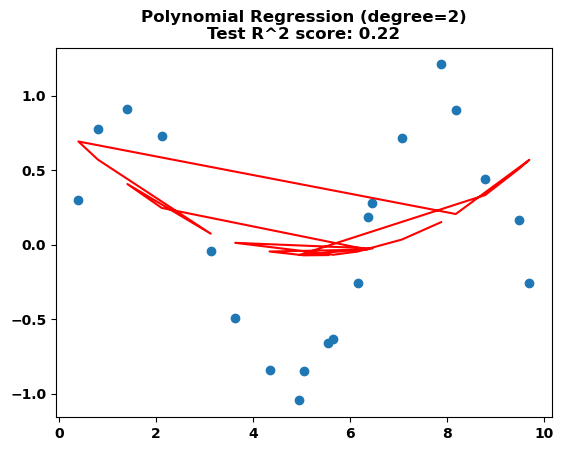

In [122]:
# Regression on Sine curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=len(x))

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create polynomial features for training and test sets
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
X_test_poly = poly.transform(x_test.reshape(-1, 1))

# Fit linear regression model to training data
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict on test data and calculate R^2 score
y_pred = lin_reg.predict(X_test_poly)
r2_score = lin_reg.score(X_test_poly, y_test)

# Plot the test data and polynomial fit
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.title(f"Polynomial Regression (degree=2)\nTest R^2 score: {r2_score:.2f}")
plt.show()


In [123]:
# Regresssion on general X,y data
import matplotlib.pyplot as plt
%matplotlib inline
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # Create polynomial features for training and test sets
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    X_test_poly = poly.transform(x_test.reshape(-1, 1))

    # Fit linear regression model to training data
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)

    # Predict on test data and calculate R^2 score
    y_pred = lin_reg.predict(X_test_poly)
    r2_score = lin_reg.score(X_test_poly, y_test)

    # Plot the test data and polynomial fit
    plt.scatter(x_test, y_test)
    plt.plot(x_test, y_pred, color='red')
    plt.title(f"Polynomial Regression (degree=2)\nTest R^2 score: {r2_score:.2f}")
    plt.show()


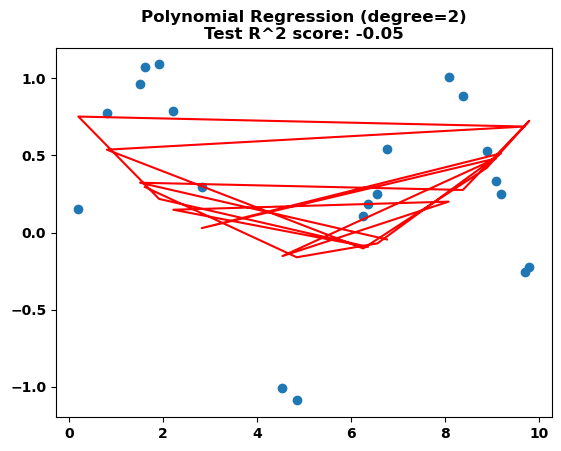

In [125]:
f(2,X_train_poly)

In [127]:
#perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.
pr1=PolynomialFeatures(degree=2)

In [128]:
#Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


In [129]:
#How many dimensions does the new feature have? Hint: use the attribute "shape".
x_train_pr1.shape #there are now 15 features

(160, 15)

In [130]:
#Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.
poly1=LinearRegression().fit(x_train_pr1,y_train)

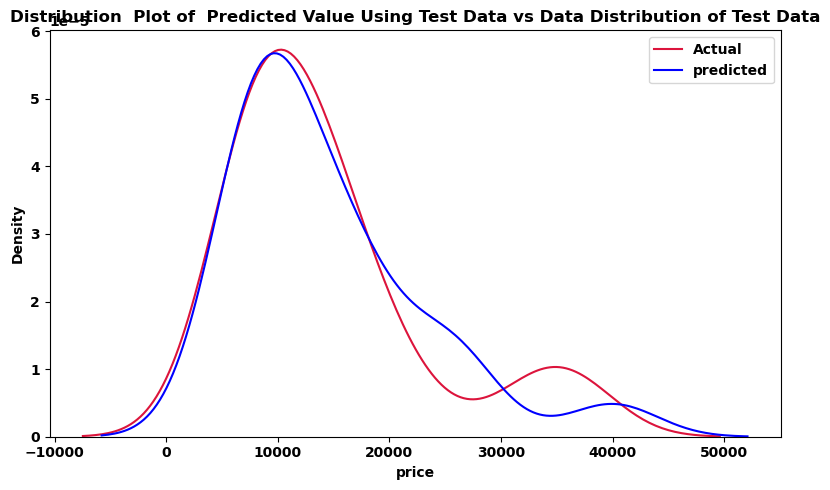

In [151]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(data=y_test, color='crimson', label='Actual', fill=False, ax=ax).set(title="Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data")
sns.kdeplot(data=yhat_test1,color='blue', label='predicted', fill=False, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

In [133]:
# Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.
print("predicted values:",yhat[0:4])
print("True values:",y_test[0:4].values)

predicted values: [ 6728.70501896  7308.02845162 12213.7843307  18893.19108677]
True values: [ 6295. 10698. 13860. 13499.]


## Ridge Regression

In [134]:
#perform a degree two polynomial transformation on our data.
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [135]:
# import Ridge from the module linear models.
from sklearn.linear_model import Ridge

In [136]:
#create a Ridge regression object, setting the regularization parameter (alpha) to 0.1
RigeModel=Ridge(alpha=0.1)

In [137]:
#fit the model using the method fit
RigeModel.fit(x_train_pr, y_train)

C:\Users\sauga\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.1173e-17): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [138]:
#obtain a prediction:
yhat = RigeModel.predict(x_test_pr)

In [139]:
#compare the first five predicted samples to our test set:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6542.66953725  9717.07336409 24389.51191717 21777.74745121]
test set : [ 6295. 10698. 13860. 13499.]


In [140]:
#select the value of alpha that minimizes the test error. To do so, we can use a for loop
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:04<00:00, 216.85it/s, Test Score=0.763, Train Score=0.866]


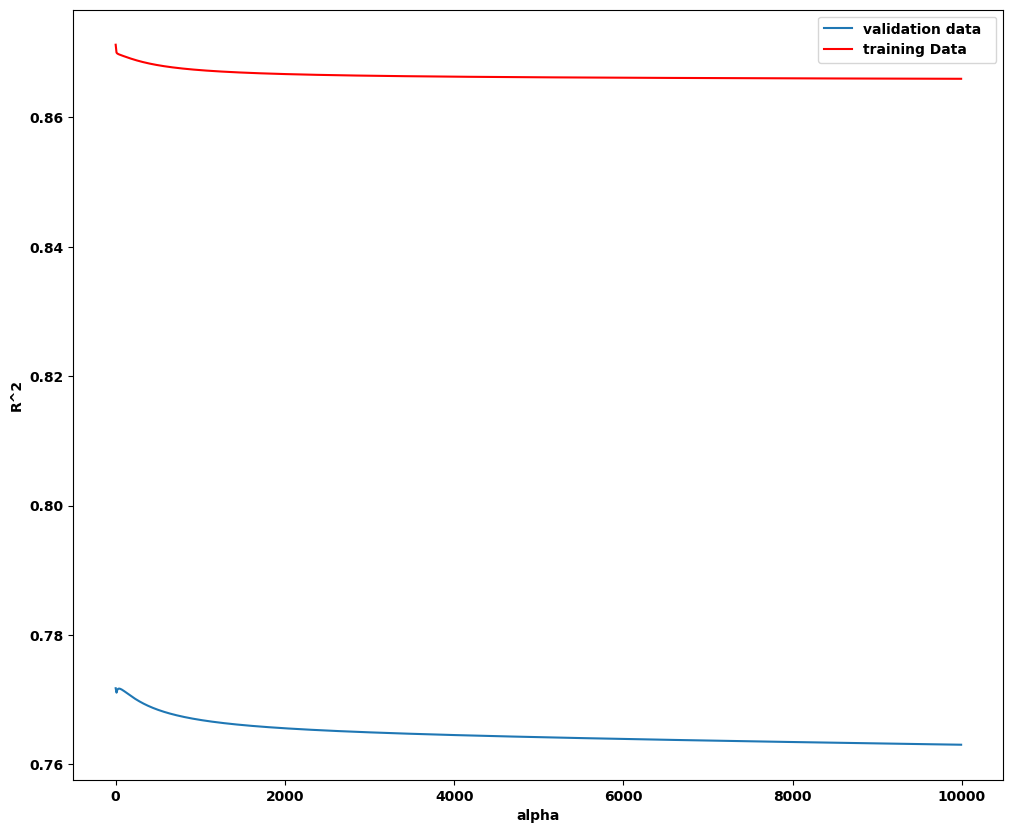

In [141]:
#plot out the value of R^2 for different alphas:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

1. Here the model is built and tested on the same data, so the training and test data are the same.
2. The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data
3. The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 decreases

In [142]:
#Perform Ridge regression. Calculate the R^2 using the polynomial features with alpha=10.
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.7710815635864072

## Grid Search

1. The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.
2. Let's import GridSearchCV from the module model_selection.

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
#create a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [145]:
#Create a Ridge regression object:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [147]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [148]:
#Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [149]:
#The object finds the best parameter values on the validation data. 
#We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [150]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.816776388706521